In [3]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

### Gross Box Office

In [4]:
movie_gross = pd.read_csv("../Data/bom.movie_gross.csv")
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
clean_df = movie_gross['title'].map(lambda x: x.lower())
clean_df.head()

0                                    toy story 3
1                     alice in wonderland (2010)
2    harry potter and the deathly hallows part 1
3                                      inception
4                            shrek forever after
Name: title, dtype: object

In [6]:
clean_df = movie_gross['title'].apply(lambda x: x.strip())
clean_df.head()

0                                    Toy Story 3
1                     Alice in Wonderland (2010)
2    Harry Potter and the Deathly Hallows Part 1
3                                      Inception
4                            Shrek Forever After
Name: title, dtype: object

### The Movies db

In [7]:
df = pd.read_csv('../Data/tmdb.movies.csv', index_col=0)
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### Comparing original_title and title

In [8]:
df.shape

(26517, 9)

In [9]:
df[['original_title', 'title']].head(10)

,original_title,title
0,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1
1,How to Train Your Dragon,How to Train Your Dragon
2,Iron Man 2,Iron Man 2
3,Toy Story,Toy Story
4,Inception,Inception
5,Percy Jackson & the Olympians: The Lightning T...,Percy Jackson & the Olympians: The Lightning T...
6,Avatar,Avatar
7,Toy Story 3,Toy Story 3
8,Despicable Me,Despicable Me
9,Megamind,Megamind


In [10]:
df['original_title'].value_counts()

Eden                                              7
Home                                              6
Lucky                                             5
Aftermath                                         5
Truth or Dare                                     5
                                                 ..
The Workers Cup                                   1
Mariah Carey's All I Want for Christmas Is You    1
This Way of Life                                  1
Cocked                                            1
The Muppets                                       1
Name: original_title, Length: 24835, dtype: int64

In [11]:
df['title'].value_counts()

Eden                               7
Home                               7
The Box                            5
Lucky                              5
Truth or Dare                      5
                                  ..
Abraham Lincoln: Vampire Hunter    1
Postcards from the Zoo             1
Evolution's Achilles' Heels        1
Ring of Deception                  1
The Muppets                        1
Name: title, Length: 24688, dtype: int64

In [12]:
df.duplicated().value_counts()

False    25497
True      1020
dtype: int64

In [13]:
df[df.duplicated(keep=False)].sort_values(by='original_title')

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
9191,[99],95383,en,$ellebrity,1.420,2013-01-11,$ellebrity,5.6,12
6315,[99],95383,en,$ellebrity,1.420,2013-01-11,$ellebrity,5.6,12
20070,"[99, 36, 10770]",430364,en,'85: The Greatest Team in Pro Football History,0.600,2018-01-29,'85: The Greatest Team in Pro Football History,7.5,2
26340,"[99, 36, 10770]",430364,en,'85: The Greatest Team in Pro Football History,0.600,2018-01-29,'85: The Greatest Team in Pro Football History,7.5,2
18016,"[18, 10749]",416691,en,1 Night,5.409,2017-02-10,1 Night,6.4,107
...,...,...,...,...,...,...,...,...,...
21659,"[18, 10749]",88752,zh,當愛來的時候,2.621,2011-03-11,When Love Comes,7.3,10
13823,"[35, 18]",281139,zh,行動代號：孫中山,0.600,2014-11-01,Meeting Dr. Sun,5.4,4
17054,"[35, 18]",281139,zh,行動代號：孫中山,0.600,2014-11-01,Meeting Dr. Sun,5.4,4
17659,"[36, 18, 10752, 28]",407887,ko,인천상륙작전,8.810,2016-08-12,Operation Chromite,6.0,86


### The Numbers db

In [14]:
df1 = pd.read_csv('../Data/tn.movie_budgets.csv', index_col=0)
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [15]:
df1['movie'].value_counts()

Halloween                               3
Home                                    3
King Kong                               3
The Avengers                            2
RoboCop                                 2
                                       ..
Siakh lokhamim: ha'slilim ha'gnouzim    1
The International                       1
Milk                                    1
Interstellar                            1
Deadpool                                1
Name: movie, Length: 5698, dtype: int64

### Joining by movie title ###

In [16]:
### FIX ME : Doesn't join on title and movie
budget_and_rating_df = df1.join(df, rsuffix= '_budget', how = 'inner')
budget_and_rating_df.head(20)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,id,original_language,original_title,popularity,release_date_budget,title,vote_average,vote_count
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279","[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,"May 29, 2009",Up,"$175,000,000","$293,004,164","$731,463,377","[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,"Mar 7, 2014",Mr. Peabody & Sherman,"$145,000,000","$111,506,430","$269,806,430","[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,"Dec 17, 2010",How Do You Know?,"$120,000,000","$30,212,620","$49,628,177","[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,"Dec 11, 2015",In the Heart of the Sea,"$100,000,000","$25,020,758","$89,693,309","[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,"Jun 8, 2007",Ocean's Thirteen,"$85,000,000","$117,144,465","$311,744,465","[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,"Nov 26, 2003",Timeline,"$80,000,000","$19,480,739","$26,703,184","[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,"Aug 21, 2009",Inglourious Basterds,"$70,000,000","$120,774,594","$316,915,264","[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,"Nov 21, 2012",Red Dawn,"$65,000,000","$44,806,783","$48,164,150","[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,"Nov 26, 1997",Alien: Resurrection,"$60,000,000","$47,795,018","$160,700,000","[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [17]:
budget_and_rating_df.value_counts()

release_date  movie                    production_budget  domestic_gross  worldwide_gross  genre_ids              id     original_language  original_title             popularity  release_date_budget  title                      vote_average  vote_count
Sep 9, 2016   When the Bough Breaks    $10,000,000        $29,747,603     $30,768,449      [10749, 35]            25195  en                 Leap Year                  11.821      2010-01-08           Leap Year                  6.7           990           1
Feb 23, 1996  Rumble in the Bronx      $7,500,000         $32,281,907     $36,238,752      [35, 16, 10751]        9994   en                 The Great Mouse Detective  13.348      1986-07-02           The Great Mouse Detective  7.1           769           1
Feb 23, 2000  Wonder Boys              $35,000,000        $19,389,454     $33,422,485      [16, 10751]            38757  en                 Tangled                    21.511      2010-11-24           Tangled                    7.5    

### IMDB db

In [18]:
import sqlite3
conn = sqlite3.connect("../Data/im.db")
sql_query = """
SELECT name FROM sqlite_master  
WHERE type='table';
"""
pd.read_sql(sql_query,conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [19]:
# Basic movie info
q = """
SELECT * FROM movie_basics
"""
movie_basics_pd = pd.read_sql(q, conn)
movie_basics_pd.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [20]:
# Ratings
q = """
SELECT * FROM movie_ratings
"""
movie_ratings_pd = pd.read_sql(q, conn)
movie_ratings_pd.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### Joining movie information

In [21]:
# Join movie_basics and movie_ratings tables from IMDB db
# Inner Join on movie_id
# Provides comparison of title, year, genres, and averagerating
# Instantiates the dataframe 'movie_info_pd'
q = """
SELECT * FROM movie_basics JOIN movie_ratings
USING(movie_id)

"""
movie_info_pd = pd.read_sql(q, conn)

In [22]:
movie_info_pd.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [23]:
type(movie_basics_pd)

pandas.core.frame.DataFrame

In [24]:
# Instantiates table movie_aka from IMDB db as dataframe movie_region_pd
q = """
SELECT * FROM movie_akas

"""
movie_region_pd = pd.read_sql(q, conn)
movie_region_pd.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [25]:
# Imports to query dataframes
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [26]:
# Testing query import
q = """SELECT
        primary_title
    FROM 
        movie_info_pd info;

"""

In [27]:
results = pysqldf(q)
results.head()

,primary_title
0,Sunghursh
1,One Day Before the Rainy Season
2,The Other Side of the Wind
3,Sabse Bada Sukh
4,The Wandering Soap Opera


In [28]:
# Concatinate dataframes movie_info_pd and movie_region_pd 
# Allows filtering by region
df = movie_info_pd.join(movie_region_pd, rsuffix= '_region_')

In [29]:
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id_region_,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [30]:
# Filter dataframe by region "US"
# As dataframe us_results
q = """SELECT
        *
    FROM 
        df
    WHERE region == "US";

"""

In [31]:
us_results = pysqldf(q)
us_results.head(15)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id_region_,ordering,title,region,language,types,attributes,is_original_title
0,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584,tt0369610,21,Jurassic World 3D,US,None,None,3-D version,0.0
1,tt0262218,Akakis mogzauroba,Akakis mogzauroba,2012,44.0,Documentary,7.8,22,tt0369610,29,Jurassic World,US,None,None,None,0.0
2,tt0263814,On kadin,On kadin,2019,NaN,Drama,7.1,100,tt0369610,2,Ebb Tide,US,None,None,fake working title,0.0
3,tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama",6.7,77,tt0369610,36,Jurassic Park IV,US,None,working,None,0.0
4,tt0330811,Regret Not Speaking,Regret Not Speaking,2011,NaN,None,6.2,10,tt0369610,44,Jurassic Park 4,US,None,None,informal alternative title,0.0
5,tt0365545,Nappily Ever After,Nappily Ever After,2018,98.0,"Comedy,Drama,Romance",6.4,6287,tt0401729,11,John Carter of Mars,US,None,working,None,0.0
6,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,tt0401729,12,A Princess of Mars,US,None,working,None,0.0
7,tt0409847,Cowboys & Aliens,Cowboys & Aliens,2011,119.0,"Action,Sci-Fi,Thriller",6.0,195889,tt0401729,2,John Carter,US,None,None,None,0.0
8,tt0425785,El borde del tiempo,El borde del tiempo,2011,100.0,Drama,6.2,6,tt0401729,5,Barsoom,US,None,None,fake working title,0.0
9,tt0448694,Puss in Boots,Puss in Boots,2011,90.0,"Action,Adventure,Animation",6.6,133355,tt1014759,23,Alice in Wonderland: An IMAX 3D Experience,US,None,None,IMAX version,0.0


In [32]:
# Checking year to find cut off for recent, relevant entries
us_results['start_year'].value_counts()

2015    1300
2016    1285
2014    1276
2017    1248
2013    1162
2012    1149
2018    1100
2011    1084
2010    1057
2019     326
Name: start_year, dtype: int64

In [33]:
# Limiting us_results to movies started in the last 5 years
# As dataframe modern_movies
modern_movies = us_results[us_results['start_year'] >= 2015]
modern_movies.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id_region_,ordering,title,region,language,types,attributes,is_original_title
2,tt0263814,On kadin,On kadin,2019,NaN,Drama,7.1,100,tt0369610,2,Ebb Tide,US,None,None,fake working title,0.0
3,tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama",6.7,77,tt0369610,36,Jurassic Park IV,US,None,working,None,0.0
5,tt0365545,Nappily Ever After,Nappily Ever After,2018,98.0,"Comedy,Drama,Romance",6.4,6287,tt0401729,11,John Carter of Mars,US,None,working,None,0.0
12,tt0470936,"Hot Country, Cold Winter","Tak erkir, tsurt dzmer",2016,104.0,Drama,4.0,62,tt10379338,1,Guys Night Out,US,None,imdbDisplay,None,0.0
17,tt0491175,Suburbicon,Suburbicon,2017,105.0,"Comedy,Crime,Drama",5.6,31294,tt1189904,1,Small Town Hero,US,None,None,None,0.0


In [34]:
# Ordering by year
q = """SELECT
        *
    FROM 
        modern_movies
    ORDER BY start_year;

"""

In [35]:
modern_movies = pysqldf(q)
modern_movies.head(15)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id_region_,ordering,title,region,language,types,attributes,is_original_title
0,tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama",6.7,77,tt0369610,36,Jurassic Park IV,US,None,working,None,0.0
1,tt0850678,Jackson Arms,Jackson Arms,2015,90.0,Romance,6.1,15,tt1248300,1,Rollers,US,None,None,None,0.0
2,tt1018728,Heart Like a Hand Grenade,Heart Like a Hand Grenade,2015,96.0,Documentary,7.4,335,tt1422800,11,Wake,US,None,festival,None,0.0
3,tt1196939,Gracie,Gracie,2015,71.0,"Crime,Drama,Fantasy",7.0,31,tt1822325,1,The Black Belle,US,None,None,None,0.0
4,tt1226766,The Great Gilly Hopkins,The Great Gilly Hopkins,2015,99.0,"Comedy,Drama,Family",6.5,3884,tt1854545,1,Jerseyboy Hero,US,None,None,None,0.0
5,tt1254322,The Girl King,The Girl King,2015,106.0,"Biography,Drama,History",5.9,3116,tt1913193,1,Utopians,US,None,None,None,0.0
6,tt1321390,Greyscale,Greyscale,2015,105.0,"Action,Crime,Drama",8.0,45,tt2057486,1,The Lazy Ones,US,None,None,None,0.0
7,tt1365050,Beasts of No Nation,Beasts of No Nation,2015,137.0,"Drama,War",7.8,63797,tt2124845,1,Luna Mesa,US,None,None,None,0.0
8,tt1369667,Me and Kaminski,Ich und Kaminski,2015,124.0,"Comedy,Drama",6.7,1125,tt2129871,1,Absolute Corruption,US,None,None,None,0.0
9,tt1390411,In the Heart of the Sea,In the Heart of the Sea,2015,122.0,"Action,Adventure,Biography",6.9,108628,tt2197094,1,Vertical,US,None,None,None,0.0


In [36]:
# Checking values of filtered and ordered data.
modern_movies['start_year'].value_counts()

2015    1300
2016    1285
2017    1248
2018    1100
2019     326
Name: start_year, dtype: int64

In [37]:
# Initial statistics of modern_movies
modern_movies.describe()


,start_year,runtime_minutes,averagerating,numvotes,ordering,is_original_title
count,5259.000000,4680.000000,5259.000000,5259.000000,5259.000000,5259.0
mean,2016.594410,95.417094,6.383856,2591.081384,3.176459,0.0
std,1.235327,29.470891,1.490126,24131.393862,5.531820,0.0
min,2015.000000,4.000000,1.000000,5.000000,1.000000,0.0
25%,2016.000000,82.000000,5.500000,14.000000,1.000000,0.0
50%,2017.000000,92.000000,6.500000,49.000000,1.000000,0.0
75%,2018.000000,105.000000,7.400000,258.000000,3.000000,0.0
max,2019.000000,1100.000000,9.800000,820847.000000,52.000000,0.0


C:\Users\ihaas\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\ihaas\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\ihaas\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


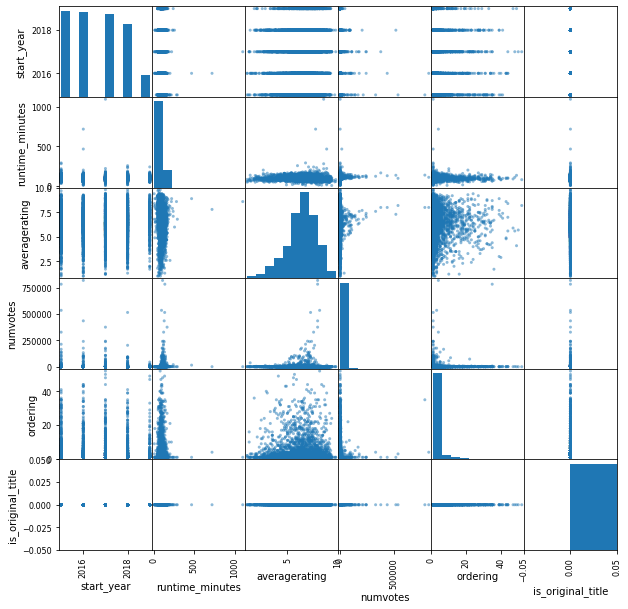

In [38]:
pd.plotting.scatter_matrix(modern_movies);

# Fix format
Adam Burstyn
Group

This notebook contains the code to explore the tables provided for the movie information

In [39]:
import pandas as pd
import sqlite3
import re

## Explore links to combine tables

### Load tables from data scources

In [40]:
# load tables from the sql db

# connect  to db
conn = sqlite3.connect("../Data/im.db")

# load movie basics table
movie_basics_df = pd.read_sql("SELECT * FROM movie_basics;", conn)

# load movie ratings table
movie_ratings_df = pd.read_sql("SELECT * FROM movie_ratings;", conn)

# load movie aka table
movie_akas_df = pd.read_sql("SELECT * FROM movie_akas;", conn)

### Load data from files

In [41]:
# load movie gross data
movie_gross = pd.read_csv("../Data/bom.movie_gross.csv")

# load movie budget/gross data
movie_budgets = pd.read_csv("../Data/tn.movie_budgets.csv")

### Preview tables

In [42]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [43]:
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [44]:
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [45]:
movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


* only about half of the movies have ratings, is it worth exploring an algorithm to impute the missing ratings?

In [46]:
movie_akas_df

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


### Combine SQL tables

In [47]:
# join tables on movie_id
df = movie_ratings_df.merge(movie_basics_df, how="inner", on="movie_id")
df = df.merge(movie_akas_df, how="inner", on="movie_id")
df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
0,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,1,Just Inès,None,None,original,None,1.0
1,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,2,Samo Ines,RS,None,imdbDisplay,None,0.0
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,3,Just Inès,GB,None,None,None,0.0
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",10,The Legend of Hercules,None,None,original,None,1.0
4,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",11,Hércules - A Lenda Começa,PT,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261801,tt9691896,6.3,21,Out,Coming Out,2018,64.0,Documentary,4,Coming Out,None,None,original,None,1.0
261802,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi",1,Code Geass: Lelouch of the Rebellion Episode III,JP,None,None,None,0.0
261803,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi",2,Code Geass: Lelouch of the Rebellion Episode III,None,None,original,None,1.0
261804,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi",3,Code Geass: Lelouch of the Rebellion - Glorifi...,XWW,en,imdbDisplay,None,0.0


### Keep only US movies

In [48]:
# find the tag for US region
df["region"].unique()

array([None, 'RS', 'GB', 'PT', 'JP', 'AL', 'HR', 'VN', 'IT', 'GR', 'UA',
       'RO', 'US', 'CA', 'CL', 'MX', 'RU', 'TR', 'IL', 'AR', 'PE', 'FR',
       'ES', 'BR', 'PL', 'BG', 'HU', 'VE', 'SE', 'XWW', 'XEU', 'SI', 'UY',
       'FI', 'DE', 'PH', 'NO', 'DK', 'EE', 'BE', 'LT', 'CO', 'CZ', 'AT',
       'GE', 'IE', 'ZA', 'BA', 'LV', 'AU', 'LU', 'IN', 'KR', 'IR', 'NL',
       'DZ', 'CN', 'NZ', 'ID', 'MY', 'JO', 'RW', 'EG', 'CH', 'LI', 'TH',
       'BF', 'CSXX', 'SG', 'NP', 'SK', 'BD', 'PA', 'KE', 'PK', 'PS', 'HK',
       'MK', 'KZ', 'TW', 'LK', 'IS', 'MW', 'DO', 'BO', 'PY', 'SL', 'AZ',
       'AF', 'AE', 'PR', 'CU', 'NG', 'IQ', 'AM', 'CY', 'GU', 'HN', 'XAS',
       'TN', 'BY', 'SA', 'HT', 'MT', 'BH', 'KH', 'KG', 'FO', 'SV', 'XSA',
       'GT', 'LB', 'BT', 'CR', 'XKV', 'UZ', 'MA', 'ME', 'LA', 'SB', 'XKO',
       'SY', 'TZ', 'QA', 'MN', 'EC', 'JM', 'NE', 'AN', 'MV', 'TT', 'ET',
       'CF', 'CM', 'MM', 'TJ', 'SM', 'MD', 'GW', 'KW', 'AD', 'BB', 'MZ',
       'BS', 'SO', 'BZ', 'IM', 'MC', 'AW', 

region is US

In [49]:
us_movies = df[df["region"]=="US"]
us_movies

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
14,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,The Legend of Hercules,US,None,None,None,0.0
26,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",31,Untitled Hercules Project,US,None,working,None,0.0
29,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",5,Hercules: The Legend Begins,US,None,working,None,0.0
42,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",4,Hamill,US,None,festival,None,0.0
45,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",7,The Hammer,US,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261737,tt9165332,7.4,710,Chitralahari,Chitralahari,2019,131.0,Drama,2,Chitralahari,US,en,imdbDisplay,None,0.0
261760,tt9382596,4.1,293,The Car: Road to Revenge,The Car: Road to Revenge,2019,89.0,"Action,Horror,Thriller",1,The Car 2: Road to Revenge,US,None,working,None,0.0
261761,tt9382596,4.1,293,The Car: Road to Revenge,The Car: Road to Revenge,2019,89.0,"Action,Horror,Thriller",2,The Car 2,US,None,working,None,0.0
261762,tt9382596,4.1,293,The Car: Road to Revenge,The Car: Road to Revenge,2019,89.0,"Action,Horror,Thriller",3,The Car: Road to Revenge,US,None,None,None,0.0


In [50]:
us_movies["movie_id"].nunique()

26654

There are duplicate movie ids

In [51]:
# keep only 1 entry for each movie id
us_movies = us_movies.drop_duplicates(subset=["movie_id"])
us_movies

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
14,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,The Legend of Hercules,US,None,None,None,0.0
42,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",4,Hamill,US,None,festival,None,0.0
64,tt1161457,4.2,148,Vanquisher,The Vanquisher,2016,90.0,"Action,Adventure,Sci-Fi",1,Vanquisher,US,None,None,new title,0.0
76,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,Baggage Claim,US,None,None,None,0.0
85,tt1174693,5.8,2381,The Four-Faced Liar,The Four-Faced Liar,2010,87.0,"Comedy,Drama,Romance",5,The Four-Faced Liar,US,None,None,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261715,tt8948790,9.0,1778,Jersey,Jersey,2019,157.0,"Drama,Sport",3,Jersey,US,en,imdbDisplay,None,0.0
261734,tt9127488,9.3,10,Postal,Postal,2019,77.0,Comedy,2,Postal,US,None,None,None,0.0
261737,tt9165332,7.4,710,Chitralahari,Chitralahari,2019,131.0,Drama,2,Chitralahari,US,en,imdbDisplay,None,0.0
261760,tt9382596,4.1,293,The Car: Road to Revenge,The Car: Road to Revenge,2019,89.0,"Action,Horror,Thriller",1,The Car 2: Road to Revenge,US,None,working,None,0.0


### Add in gross numbers

#### Clean movie title info for merging
- all lowercase
- keep only alpha-numeric values
- remove spaces

In [52]:
# use RegEx to keep only alpha-numeric values, remove spaces and make all letters lowercase 
#us_movies["title"] = us_movies["title"].map(lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', x).lower())
us_movies["title"] = us_movies["title"].map(lambda x: re.sub(r'[^A-Za-z0-9]+', '', x).lower())
movie_budgets["movie"] = movie_budgets["movie"].map(lambda x: re.sub(r'[^A-Za-z0-9]+', '', x).lower())
movie_gross["title"] = movie_gross["title"].map(lambda x: re.sub(r'[^A-Za-z0-9]+', '', x).lower())

<ipython-input-52-006c2fb176b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_movies["title"] = us_movies["title"].map(lambda x: re.sub(r'[^A-Za-z0-9]+', '', x).lower())


In [53]:
# rename columns to match for merging
movie_budgets.rename(columns={"movie": "title", "domestic_gross": "domestic_gross_movie_budgets",
                              "worldwide_gross": "worldwide_gross_movie_budgets"}, inplace=True)

movie_gross.rename(columns={"domestic_gross": "domestic_gross_movie_gross", 
                            "foreign_gross": "foreign_gross_movie_gross"}, inplace=True)

In [54]:
# combine tables
final_gross_df1 = us_movies.merge(movie_budgets, on="title", how="inner")
final_gross_df1

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title,id,release_date,production_budget,domestic_gross_movie_budgets,worldwide_gross_movie_budgets
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,thelegendofhercules,US,None,None,None,0.0,42,"Jan 10, 2014","$70,000,000","$18,848,538","$58,953,319"
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,US,None,None,None,0.0,38,"Sep 27, 2013","$8,500,000","$21,569,509","$22,885,836"
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",14,moneyball,US,None,imdbDisplay,None,0.0,15,"Sep 23, 2011","$50,000,000","$75,605,492","$111,300,835"
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",4,hereafter,US,None,None,None,0.0,61,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270"
4,tt6096334,6.4,5,Here After,Here After,2018,71.0,Documentary,1,hereafter,US,None,None,None,0.0,61,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,tt2592614,5.6,74979,Resident Evil: The Final Chapter,Resident Evil: The Final Chapter,2016,107.0,"Action,Horror,Sci-Fi",2,residentevilthefinalchapter,US,None,None,None,0.0,84,"Jan 27, 2017","$40,000,000","$26,844,692","$314,101,190"
1685,tt2612800,5.7,37,Sisters,Schwestern,2013,84.0,Drama,2,sisters,US,None,imdbDisplay,None,0.0,57,"Dec 18, 2015","$30,000,000","$87,044,645","$106,030,660"
1686,tt2704998,7.0,163279,Game Night,Game Night,2018,100.0,"Action,Comedy,Crime",15,gamenight,US,None,imdbDisplay,None,0.0,94,"Feb 23, 2018","$37,000,000","$69,179,066","$117,378,084"
1687,tt3111864,5.0,102,8 Days,8 Days,2014,90.0,"Drama,Thriller",1,8days,US,None,None,None,0.0,48,"Oct 13, 2015","$2,500,000",$0,$0


In [55]:
final_gross_df2 = us_movies.merge(movie_gross, on="title", how="inner")
final_gross_df2

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title,studio,domestic_gross_movie_gross,foreign_gross_movie_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,thelegendofhercules,US,None,None,None,0.0,LG/S,18800000.0,42400000,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,US,None,None,None,0.0,FoxS,21600000.0,887000,2013
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",14,moneyball,US,None,imdbDisplay,None,0.0,Sony,75600000.0,34600000,2011
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",4,hereafter,US,None,None,None,0.0,WB,32700000.0,72500000,2010
4,tt6096334,6.4,5,Here After,Here After,2018,71.0,Documentary,1,hereafter,US,None,None,None,0.0,WB,32700000.0,72500000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,tt2592614,5.6,74979,Resident Evil: The Final Chapter,Resident Evil: The Final Chapter,2016,107.0,"Action,Horror,Sci-Fi",2,residentevilthefinalchapter,US,None,None,None,0.0,SGem,26800000.0,285400000,2017
1563,tt2612800,5.7,37,Sisters,Schwestern,2013,84.0,Drama,2,sisters,US,None,imdbDisplay,None,0.0,Uni.,87000000.0,18000000,2015
1564,tt2704998,7.0,163279,Game Night,Game Night,2018,100.0,"Action,Comedy,Crime",15,gamenight,US,None,imdbDisplay,None,0.0,WB (NL),69200000.0,48500000,2018
1565,tt7008872,7.0,18768,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",16,boyerased,US,None,imdbDisplay,None,0.0,Focus,6800000.0,5000000,2018


In [56]:
final_gross_all = final_gross_df1.merge(final_gross_df2[["title", "domestic_gross_movie_gross", "foreign_gross_movie_gross"]],
                                        how="inner", on="title")
final_gross_all

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,...,types,attributes,is_original_title,id,release_date,production_budget,domestic_gross_movie_budgets,worldwide_gross_movie_budgets,domestic_gross_movie_gross,foreign_gross_movie_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,thelegendofhercules,...,None,None,0.0,42,"Jan 10, 2014","$70,000,000","$18,848,538","$58,953,319",18800000.0,42400000
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,...,None,None,0.0,38,"Sep 27, 2013","$8,500,000","$21,569,509","$22,885,836",21600000.0,887000
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",14,moneyball,...,imdbDisplay,None,0.0,15,"Sep 23, 2011","$50,000,000","$75,605,492","$111,300,835",75600000.0,34600000
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",4,hereafter,...,None,None,0.0,61,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270",32700000.0,72500000
4,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",4,hereafter,...,None,None,0.0,61,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270",32700000.0,72500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,tt2125435,7.3,77440,Beasts of the Southern Wild,Beasts of the Southern Wild,2012,93.0,"Adventure,Drama,Fantasy",6,beastsofthesouthernwild,...,None,None,0.0,18,"Jun 27, 2012","$1,800,000","$12,795,746","$23,265,132",12800000.0,8300000
1071,tt2333784,6.1,156432,The Expendables 3,The Expendables 3,2014,126.0,"Action,Adventure,Thriller",11,theexpendables3,...,None,None,0.0,96,"Aug 15, 2014","$100,000,000","$39,322,544","$209,461,378",39300000.0,175300000
1072,tt2592614,5.6,74979,Resident Evil: The Final Chapter,Resident Evil: The Final Chapter,2016,107.0,"Action,Horror,Sci-Fi",2,residentevilthefinalchapter,...,None,None,0.0,84,"Jan 27, 2017","$40,000,000","$26,844,692","$314,101,190",26800000.0,285400000
1073,tt2612800,5.7,37,Sisters,Schwestern,2013,84.0,Drama,2,sisters,...,imdbDisplay,None,0.0,57,"Dec 18, 2015","$30,000,000","$87,044,645","$106,030,660",87000000.0,18000000


### Convert $ strings into floats that can be aggreggated

In [57]:
final_gross_all['production_budget'] = final_gross_all['production_budget'].replace('[$,()]', '', regex=True).astype(float)
final_gross_all['domestic_gross_movie_gross'] = final_gross_all['domestic_gross_movie_gross'].replace('[$,()]', '', regex=True).astype(float)

In [58]:
domestic_budget = final_gross_all['production_budget']
domestic_gross = final_gross_all['domestic_gross_movie_gross']

In [59]:
final_gross_all[['production_budget', 'domestic_gross_movie_gross']]

,production_budget,domestic_gross_movie_gross
0,70000000.0,18800000.0
1,8500000.0,21600000.0
2,50000000.0,75600000.0
3,50000000.0,32700000.0
4,50000000.0,32700000.0
...,...,...
1070,1800000.0,12800000.0
1071,100000000.0,39300000.0
1072,40000000.0,26800000.0
1073,30000000.0,87000000.0


In [60]:
# Budget
import numpy as np
x_bar = np.mean(domestic_budget)
s = np.std(domestic_budget, ddof = 1)
print(x_bar, s)

45074611.29488372 50270949.473341465


In [61]:
# Gross income
x_bar = np.mean(domestic_gross)
s = np.std(domestic_gross, ddof = 1)
print(x_bar, s)

62437350.4083721 81710967.95563814


### Find the t-critical value

In [62]:
from scipy import stats
q = 0.0975
df = len(domestic_budget) - 1
stats.t.ppf(q, df)

-1.2967376368681658

### Distributions

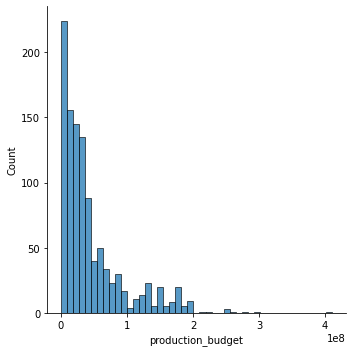

In [63]:
import seaborn as sns

#Budget
sns.displot(domestic_budget);

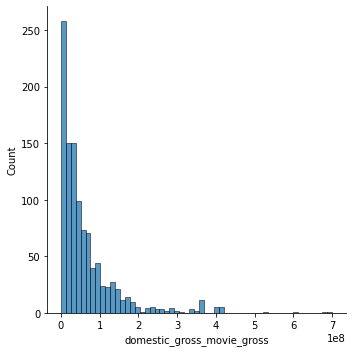

In [64]:
# Gross income
sns.displot(domestic_gross);

In [65]:
# Net income
domestic_net_income = domestic_gross - domestic_budget
domestic_net_income.head()

0   -51200000.0
1    13100000.0
2    25600000.0
3   -17300000.0
4   -17300000.0
dtype: float64

### Add net_income as a column to final_gross_all

In [66]:
final_gross_all['domestic_net_income'] = final_gross_all['domestic_gross_movie_gross'] - final_gross_all['production_budget']

In [68]:
final_gross_all[['production_budget', 'domestic_gross_movie_gross', 'domestic_net_income']]

,production_budget,domestic_gross_movie_gross,domestic_net_income
0,70000000.0,18800000.0,-51200000.0
1,8500000.0,21600000.0,13100000.0
2,50000000.0,75600000.0,25600000.0
3,50000000.0,32700000.0,-17300000.0
4,50000000.0,32700000.0,-17300000.0
...,...,...,...
1070,1800000.0,12800000.0,11000000.0
1071,100000000.0,39300000.0,-60700000.0
1072,40000000.0,26800000.0,-13200000.0
1073,30000000.0,87000000.0,57000000.0


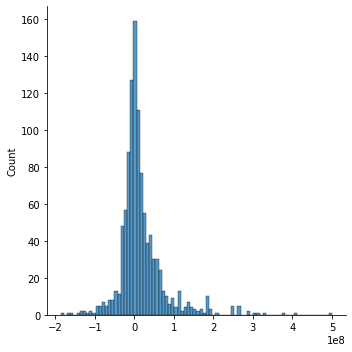

In [67]:
sns.displot(domestic_net_income);

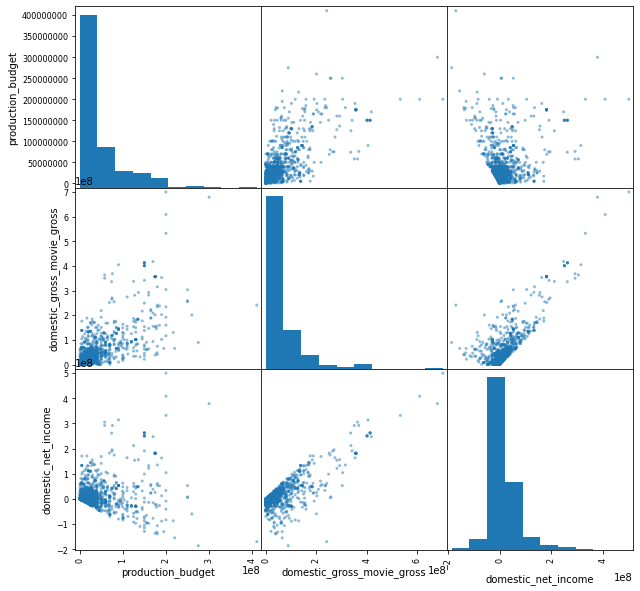

In [69]:
pd.plotting.scatter_matrix(final_gross_all[['production_budget', 'domestic_gross_movie_gross', 'domestic_net_income']]);